#Exploring Review Data
- let's look at some typical reviews, how many files there are, what the distributions of review lengths and hours played are, etc.

In [83]:
# Pretty much, this is my standard header because I use these following
# two libraries all the time
import sys
import os

In [84]:
# So, let's take a look at how many lines are in our reviews files
# Note: I just started processing GTAV after ending all the other processes
os.chdir('/home/mulhollandm2/reviews_project/reviewer_experience_prediction')
! wc -l data/*.txt

   30910 data/Arma_3.txt
   66500 data/Counter_Strike_Global_Offensive.txt
   17712 data/Counter_Strike.txt
   61900 data/Dota_2.txt
    2346 data/Football_Manager_2015.txt
   65860 data/Garrys_Mod.txt
   19880 data/Grand_Theft_Auto_V.txt
   67076 data/Sid_Meiers_Civilization_5.txt
   63840 data/Team_Fortress_2.txt
   65578 data/The_Elder_Scrolls_V.txt
   49270 data/Warframe.txt
  510872 total


In [85]:
# This is a stripped-down version of the function in read_data_files.py
# Note: I decided to get rid of the language identification rule for the time
# being because I don't want this function to take too long or else it will be
# useless in this context. We will still use the rule, just not in this
# notebook setting.
def get_reviews_for_game(file_name):
    '''
    Get list of reviews in a single game file.

    :param file_name: name of file
    :type file_name: str
    :returns: list of dicts
    '''

    reviews = []
    lines = open(file_name).readlines()
    i = 0
    while i + 1 < len(lines): # We need to get every 2-line couplet
        # Extract the hours value and the review text from each 2-line
        # sequence
        try:
            h = float(lines[i].split()[1].strip())
            r = lines[i + 1].split(' ', 1)[1].strip()
        except (ValueError, IndexError) as e:
            i += 2
            continue
        reviews.append(dict(hours=h,
                            review=r))
        i += 2 # Increment i by 2 since we need to go to the next
            # 2-line couplet
    return reviews

# Arma 3 Stats

In [86]:
# So, let's first get all of the reviews for the game with the smallest amount of
# review data, i.e., Football Manager 2015 (not including GTAV)
reviews = get_reviews_for_game('data/Arma_3.txt')

In [87]:
# First of all, how many reviews are there?
print('number of reviews: {}'.format(len(reviews)))

number of reviews: 15455


In [88]:
# Here's a couple reviews from the beginning of the file
reviews[:3]

[{'hours': 206.5,
  'review': 'My first game on A3 brought me the most horrific experience I\'ve ever had in any game, ever. We\'re on our way to the objective, a small dump east of a town occupied by enemy forces. I\'m leading a team of 4 men. We come to a crossroad and I sprint across, telling my men to hold back. I cross a few more times, trying to get a response from any snipers. Nothing. I run, my SAW gunner runs, my medic runs. But I kept my Marksman on the other side to make sure we\'d make it across. Anybody seen Full Metal Jacket all the way through? Remember the sniper scene? The marksman takes a round in the leg as we\'re running and goes down. He then takes two more in the chest. The kid who was playing had some mad acting skills, he played it up to 11 here. He screams as he\'s being shot. Crawling, drenched in his own blood. "SARGE? YOU AIN\'T LEAVING ME OUT HERE LIKE THIS, RIGHT? I-I WANNA GO WITH YOU GUYS! C\'MON SARGE, H-HELP ME! C\'MON! PLEASE DON\'T LEAVE ME!" he died

#Arma 3: Review Length Distribution

In [89]:
# Let's measure the lengths of each review using a "list comprehension"
lengths = [len(review['review']) for review in reviews]
# Let's print out the first 10 lengths, just to see what we're working with
lengths[:10]

[1029, 2375, 3985, 62, 329, 190, 1135, 235, 2135, 3279]

In [92]:
# Compute the average length value
avg_len = sum(lengths)/len(lengths)
print('average length: {}'.format(avg_len))

average length: 238.88922678744743


In [93]:
min_len = min(lengths)
print('minimum review length = {}'.format(min_len))

minimum review length = 1


In [94]:
max_len = max(lengths)
print('maximum review length = {}'.format(max_len))

maximum review length = 7953


In [95]:
# Let's try to make a list of rounded length values where we round to the nearest
# 300 (I know, that's a pretty strange kind of thing to do)
from math import ceil
# We can do this by diving each length by 300, then rounding up, then multiplyig by 300
rounded_lengths = [ceil(l/300)*300 for l in lengths]
print('original lengths (first 10):          {}\nrounded lengths (to the nearest 300): {}'.format(
    lengths[:10],
    rounded_lengths[:10]))

original lengths (first 10):          [1029, 2375, 3985, 62, 329, 190, 1135, 235, 2135, 3279]
rounded lengths (to the nearest 300): [1200, 2400, 4200, 300, 600, 300, 1200, 300, 2400, 3300]


In [96]:
# Now, let's make a frequency distribution with the collections.Counter module
from collections import Counter
rounded_length_fdist = Counter(rounded_lengths)
rounded_length_fdist

Counter({300: 12306, 600: 1626, 900: 650, 1200: 320, 1500: 187, 1800: 108, 2100: 78, 2400: 37, 2700: 29, 3300: 23, 3900: 22, 3000: 20, 3600: 12, 4200: 12, 5100: 5, 8100: 4, 5700: 3, 7500: 3, 7800: 3, 4800: 2, 6000: 2, 4500: 1, 6300: 1, 6900: 1})

In [97]:
# Let's try to print out the freq dist in a nice way
# Bear with me as I attempt to use pandas, which is a very nice Python library
import pandas as pd

In [98]:
# Usually, when you use Pandas, you're using a dataframe, but a dataframe, as I understand
# it, it just made up on a set of "Series"
# Let's make a Series from our rounded lengths and then call its value_counts() method to
# get exactly what collections.Counter was doing (but we'll be able to use it to make a
# nice plot)
rounded_length_series = pd.Series(rounded_lengths)
rounded_length_series.value_counts()

300     12306
600      1626
900       650
1200      320
1500      187
1800      108
2100       78
2400       37
2700       29
3300       23
3900       22
3000       20
4200       12
3600       12
5100        5
8100        4
7800        3
5700        3
7500        3
4800        2
6000        2
6300        1
4500        1
6900        1
dtype: int64

In [102]:
# If 90% of the reviews have length <= 600 of the reviews, but not 300,
# let's set MAXLEN to 600
len([r for r in reviews if len(r['review']) <= 600])/len(reviews) >= 0.9

True

In [103]:
# So, we can use 600 for the length value

(array([  1.45820000e+04,   6.15000000e+02,   1.15000000e+02,
          7.20000000e+01,   3.40000000e+01,   1.50000000e+01,
          8.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+01]),
 array([  300.,  1080.,  1860.,  2640.,  3420.,  4200.,  4980.,  5760.,
         6540.,  7320.,  8100.]),
 <a list of 10 Patch objects>)

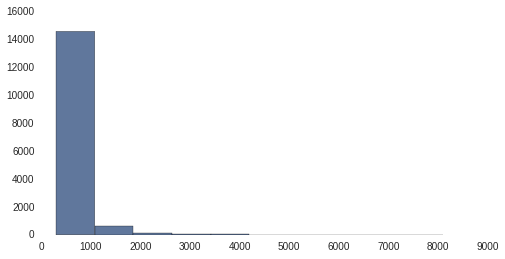

In [104]:
# The table above is nice, but let's do better and try to get a histogram
# Don't worry about all this importing stuff, it's just from something I read in a blog
# post
# Actually, go and check out the blog post here:
# http://nbviewer.ipython.org/github/mwaskom/seaborn/blob/master/examples/plotting_distributions.ipynb
# It's in, you guessed it, an IPython notebook! Shows what you can do with
# matplotlib.
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
plt.hist(rounded_length_series)

#Arma 3: Hours Distribution

In [105]:
# Let's do a similar kind of thing for the hours values
hours = [review['hours'] for review in reviews]
hours[:10]

[206.5, 65.9, 576.8, 92.3, 46.7, 2687.4, 919.3, 958.1, 457.1, 280.1]

In [106]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.1
max: 4785.5


In [107]:
rounded_hours = [ceil(h/300)*300 for h in hours]

In [108]:
rounded_hours[:10]

[300, 300, 600, 300, 300, 2700, 1200, 1200, 600, 300]

In [109]:
# Let's use pandas again instead of collections.Counter
rounded_hours_series = pd.Series(rounded_hours)
rounded_hours_series.value_counts()

300     11318
600      2273
900       894
1200      439
1500      256
1800      112
2100       69
2400       47
2700       18
3000       13
3600        5
3900        4
3300        3
4200        3
4800        1
dtype: int64

(array([  1.35910000e+04,   8.94000000e+02,   6.95000000e+02,
          1.12000000e+02,   1.16000000e+02,   1.80000000e+01,
          1.60000000e+01,   5.00000000e+00,   7.00000000e+00,
          1.00000000e+00]),
 array([  300.,   750.,  1200.,  1650.,  2100.,  2550.,  3000.,  3450.,
         3900.,  4350.,  4800.]),
 <a list of 10 Patch objects>)

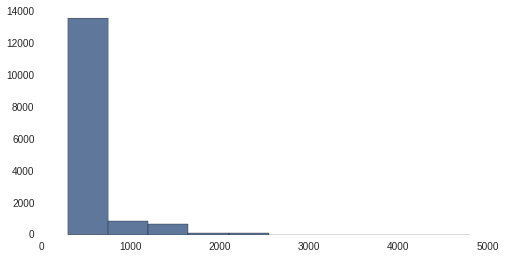

In [110]:
# Let's plot it!
plt.hist(rounded_hours_series)

In [112]:
# If 90% of the reviews have hours values <= 900 of the reviews, but not 600,
# let's set MAXHOURS to 900
len([r for r in reviews if r['hours'] <= 900])/len(reviews) >= 0.9

True

In [65]:
# Playing around with this library called plotly
# Let's try to make a histogram in a slightly different kind of way
import plotly
import plotly.tools as tls
import plotly.plotly as py
from plotly.graph_objs import *
rounded_lengths_data = Data([
                             Histogram(
                                       x=rounded_lengths
                                       )
                             ])

In [66]:
plot_url = py.plot(rounded_lengths_data, filename='basic-histogram')

In [67]:
# Hmm, seems kind of interesting, there's a lot of stuff you can do with
# visualizing the data
# Here's the plot url, but I don't know if anybody but me will be able to see it,
# so, I'm going to try to put the graph directly in the IPython notebook.
plot_url

'https://plot.ly/~mulhod/4'

In [68]:
py.iplot(rounded_lengths_data, filename='basic-histogram')

In [69]:
# It's nice how interactive the graphs from plotly are! Hover around on
# the graph. Also, look at the lower right and right-click the "Play
# with this data! >>" button

In [70]:
# Anyway, this was just an aside. You don't need to do the plotly stuff
# for every game, though it actually does look nicer. Use either plotly or
# matplotlib

#Grand Theft Auto V Stats

In [113]:
reviews = get_reviews_for_game('data/Grand_Theft_Auto_V.txt')
reviews[:3]

[{'hours': 27.8,
  'review': "Game of the year simulator. If you're thinking about buying a game and you don't have GTA5 you basically need this game. BEWARE you need a pretty fast computer to keep up, the game is cheap in comparison to what you might need to spend to get it running but I can play it on a Radeon HD 5870 1GB without much fuss so the fact that it can run on 2009 hardware is pretty impressive. No complaints in the optimization department. I must say, the PC options are fantastic. There is a LOT of tweaking to do, especially in regards to the controller and keyboard settings in addition to the expansive performance tweaks. My favorite part is having a keyboard and mouse and gamepad in front of me and when the game gets to an intense shooting part I can put down my controller and use the keyboard/mouse and start shooting without having to go to a settings menu and change anything. It just works. It's perfect. The gameplay itself needs no introduction. You can do pretty much

#Grand Theft Auto V: Review Length Distribution

In [114]:
lengths = [len(review['review']) for review in reviews]
lengths[:10]

[1129, 39, 68, 63, 85, 79, 357, 203, 2034, 15]

In [115]:
print("min: {}\nmax: {}".format(min(lengths), max(lengths)))

min: 1
max: 7958


In [116]:
rounded_lengths = [ceil(l/300)*300 for l in lengths]
rounded_lengths[:10]

[1200, 300, 300, 300, 300, 300, 600, 300, 2100, 300]

In [119]:
# If 90% of the reviews have length <= 600 of the reviews, but not 300,
# let's set MAXLEN to 600
len([r for r in reviews if len(r['review']) <= 600])/len(reviews) >= 0.9

True

(array([  9.43500000e+03,   3.67000000e+02,   6.70000000e+01,
          3.60000000e+01,   9.00000000e+00,   1.10000000e+01,
          7.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          5.00000000e+00]),
 array([  300.,  1080.,  1860.,  2640.,  3420.,  4200.,  4980.,  5760.,
         6540.,  7320.,  8100.]),
 <a list of 10 Patch objects>)

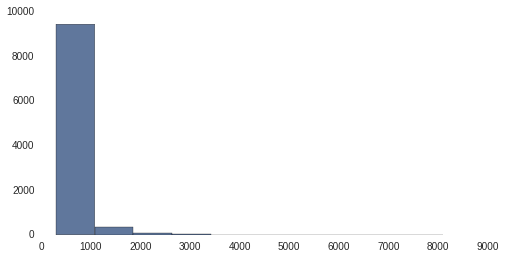

In [120]:
rounded_lengths_series = pd.Series(rounded_lengths)
plt.hist(rounded_lengths_series)

#Grand Theft Auto V: Review Hours Played Distribution

In [121]:
hours = [review['hours'] for review in reviews]
hours[:10]

[27.8, 48.8, 56.0, 59.7, 3.8, 22.5, 19.0, 66.6, 75.8, 61.4]

In [122]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.1
max: 235.0


In [123]:
rounded_hours = [ceil(h/10)*10 for h in hours]
rounded_hours[:10]

[30, 50, 60, 60, 10, 30, 20, 70, 80, 70]

(array([  4.25200000e+03,   2.75000000e+03,   1.63700000e+03,
          9.80000000e+02,   1.96000000e+02,   8.20000000e+01,
          3.10000000e+01,   4.00000000e+00,   6.00000000e+00,
          2.00000000e+00]),
 array([  10.,   33.,   56.,   79.,  102.,  125.,  148.,  171.,  194.,
         217.,  240.]),
 <a list of 10 Patch objects>)

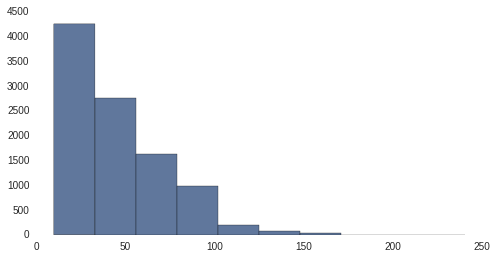

In [124]:
rounded_hours_series = pd.Series(rounded_hours)
plt.hist(rounded_hours_series)

In [133]:
# If 90% of the reviews have hours values <= 80 of the reviews, but not 70,
# let's set MAXHOURS to 80
len([r for r in reviews if r['hours'] <= 80])/len(reviews) >= 0.9

True